In [1]:
import numpy as np
import pandas as pd
from scipy import integrate
from scipy.signal import argrelextrema
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# Importing the data
raw_sensor_data_500ms = pd.read_csv('har_sensor_data_500.csv', sep=',')

Text(0.5,1,'$ACC_X$, $ACC_Y$ and $ACC_Z$ Raw sensor data')

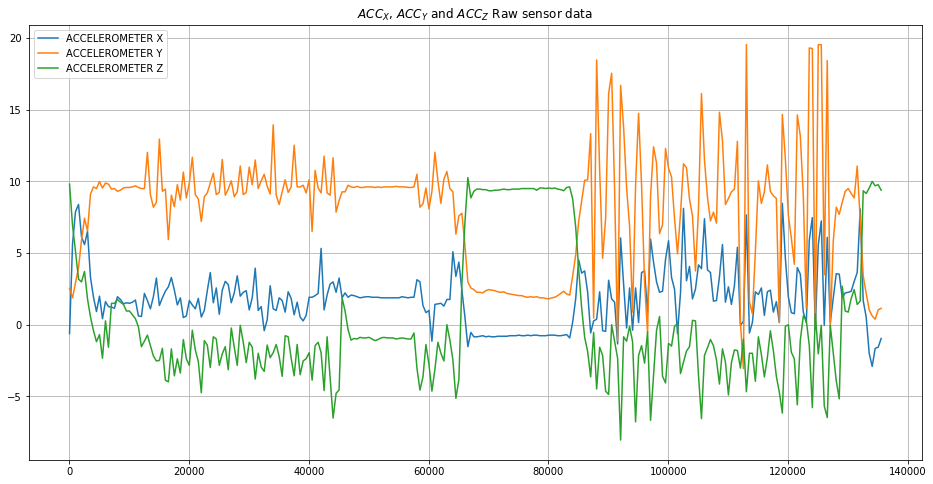

In [25]:
#Ploting the raw data
AX = plt.figure(figsize=(16,8))
plt.plot(raw_sensor_data_500ms['Time'], raw_sensor_data_500ms['ACCELEROMETER X'])
plt.plot(raw_sensor_data_500ms['Time'], raw_sensor_data_500ms['ACCELEROMETER Y'])
plt.plot(raw_sensor_data_500ms['Time'], raw_sensor_data_500ms['ACCELEROMETER Z'])
plt.grid()
plt.legend()
plt.title('$ACC_X$, $ACC_Y$ and $ACC_Z$ Raw sensor data')

In [4]:
# Setting the working dataframe and other variables
CONSTANT_G = 9.82912

df = pd.DataFrame({'Time': [], 
                   'ACC_X': [], 
                   'ACC_Y': [], 
                   'ACC_Z':[], 
                   'ACC_RMS': [], 
                   'Speed': [], 
                   'Distance': [], 
                   'Cumulated Distance':[]})

# Calibrating the ACC_X, ACC_Y and ACC_Z data along each accelerometer axis
df['ACC_X'] = raw_sensor_data_500ms['ACCELEROMETER X'] 
df['ACC_Y'] = raw_sensor_data_500ms['ACCELEROMETER Y'] 
df['ACC_Z'] = raw_sensor_data_500ms['ACCELEROMETER Z'] 

# Transforming the time to IS units
df['Time'] = (raw_sensor_data_500ms['Time'] - raw_sensor_data_500ms['Time'].iloc[0]) / 1000 #s

# Rounds the time units
df['Time'] = np.round(df['Time'], decimals=2)

# The acceleration root mean square magnitude
df['ACC_RMS'] = (df['ACC_X']**2 + df['ACC_Y'] **2 + df['ACC_Z']**2) ** 0.5 - 9.81

# Speed in m/s
# Returns the cumulative integral, hence needs to be differentiated to get the instantaneous speed
df['Speed'] = integrate.cumtrapz(df['ACC_Z'], df['Time'], initial=0.0)
# Differentiating to get the instantaneous speed
# df['Speed'] = df['Speed'].diff()
# Fills the first NaN value at index 0 resulted from differentiation
df['Speed'].fillna(0, inplace=True)

# Distance in m
# Returns the cumulative integral, hence needs to be differentiated to get the instantaneous distance
df['Cumulated Distance'] = integrate.cumtrapz(df['Speed'], df['Time'], initial=0.0)
# Diferentiating to get the instantaneous distance
# df['Distance'] = df['Cumulated Distance'].diff()
# Fills the first NaN value at the index 0 resulted from differentiation
df['Distance'].fillna(0, inplace=True)

# Shows the resulting df
df.head()

,Time,ACC_X,ACC_Y,ACC_Z,ACC_RMS,Speed,Distance,Cumulated Distance
0,0.0,-0.6129,2.5283,9.8067,0.335901,0.000000,0.0,0.000000
1,0.5,5.6312,1.8771,6.9336,-0.682639,4.185075,0.0,1.046269
2,1.0,7.8913,2.9113,5.0949,0.023936,7.192200,0.0,3.890587
3,1.5,8.3893,3.9840,3.1795,0.006406,9.260800,0.0,8.003837
4,2.0,6.1292,5.8993,2.9880,-0.793516,10.802675,0.0,13.019706


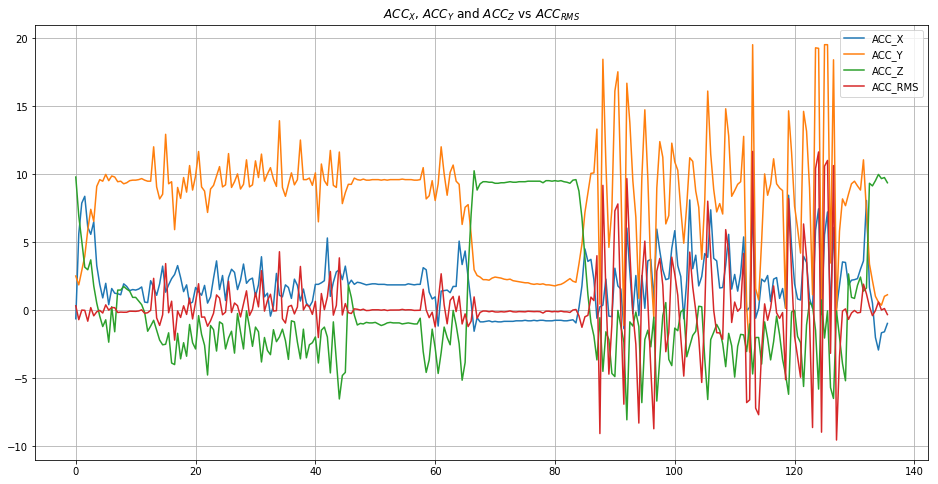

In [24]:
ax = plt.figure(figsize=(16,8))
plt.plot(df['Time'], df['ACC_X'])
plt.plot(df['Time'], df['ACC_Y'])
plt.plot(df['Time'], df['ACC_Z'])
plt.plot(df['Time'], df['ACC_RMS'])
plt.grid()
plt.title('$ACC_X$, $ACC_Y$ and $ACC_Z$ vs $ACC_{RMS}$')
plt.legend()

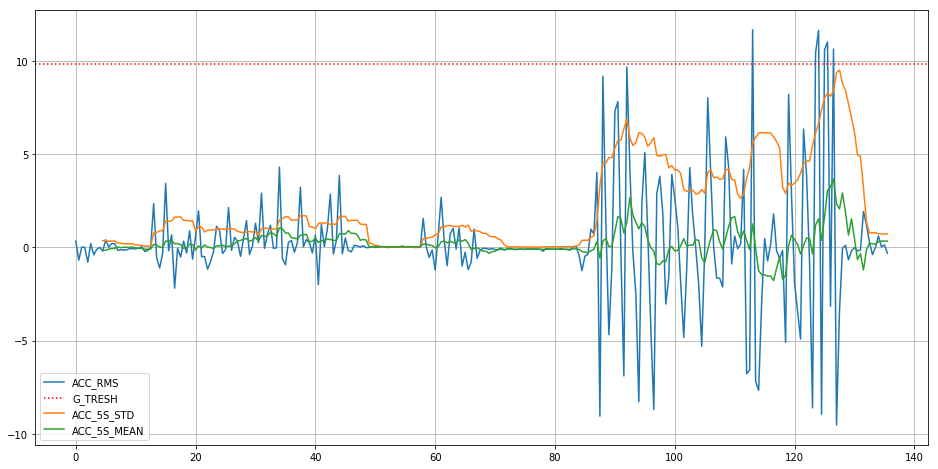

In [6]:
# Standard deviation
AX = plt.figure(figsize=(16,8))
plt.plot(df['Time'], df['ACC_RMS'])
plt.axhline(y=9.82912, color='r', linestyle=':')
plt.plot(df['Time'], df['ACC_RMS'].rolling(10).std())
plt.plot(df['Time'], df['ACC_RMS'].rolling(10).mean())
plt.legend(['ACC_RMS', 'G_TRESH', 'ACC_5S_STD', 'ACC_5S_MEAN'])
plt.grid()

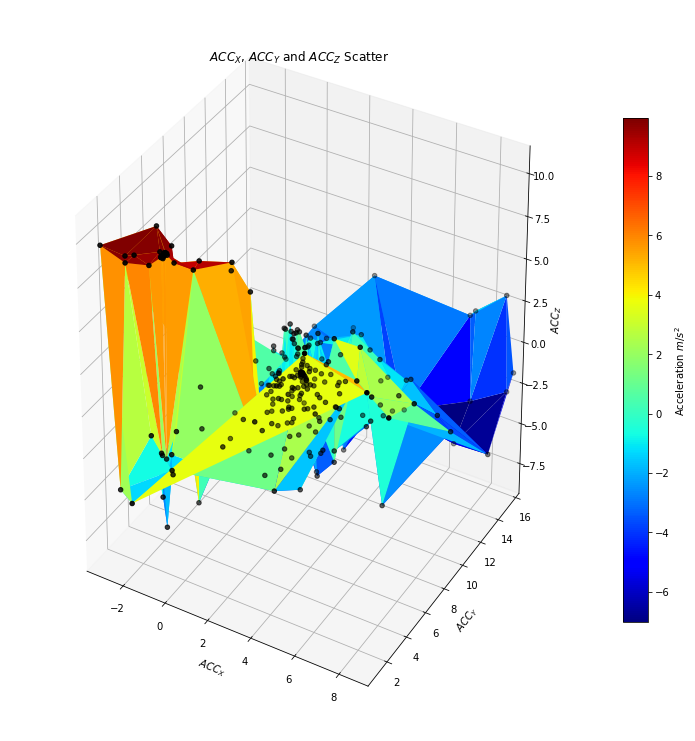

In [21]:
AX3D = Axes3D(plt.figure(figsize=(10,10)))

ACC_SURF = AX3D.plot_trisurf(df['ACC_X'], df['ACC_Y'], df['ACC_Z'], cmap=cm.jet, linewidth=0.1)

AX3D.scatter(df['ACC_X'], df['ACC_Y'], df['ACC_Z'], color='k')

AX3D.set_xlabel('$ACC_X$')
AX3D.set_ylabel('$ACC_Y$')
AX3D.set_zlabel('$ACC_Z$')

CBAR = plt.colorbar(ACC_SURF, shrink=0.7)
CBAR.set_label('Acceleration $m/s^2$')

plt.axis('equal')
plt.title('$ACC_X$, $ACC_Y$ and $ACC_Z$ Scatter')
plt.show()

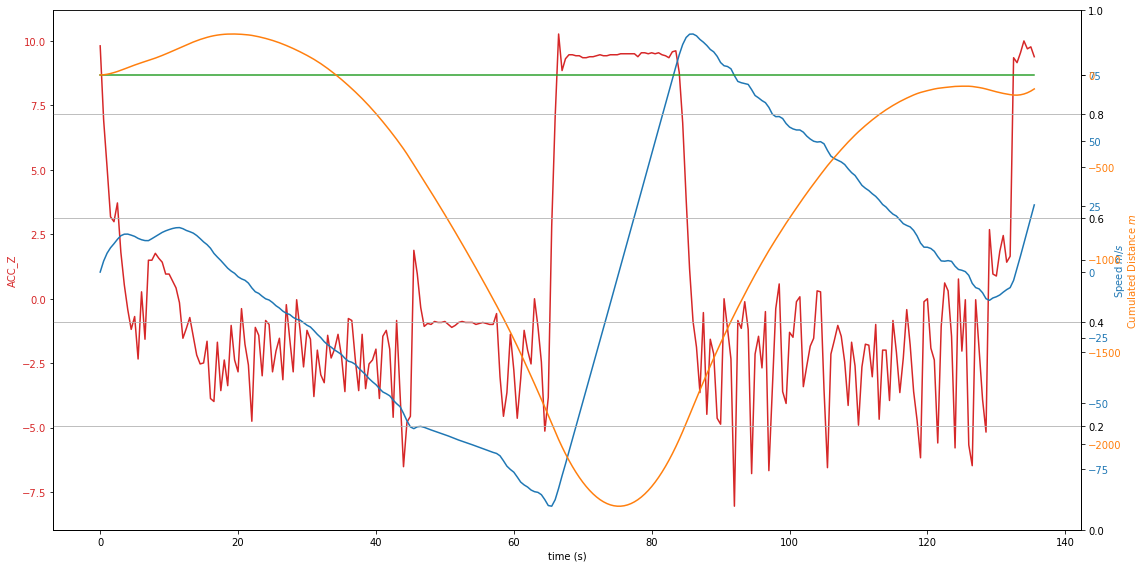

In [8]:
#SAcceleration RMS, Speed, Distance and Cumulated distance

FIG, AX1 = plt.subplots(figsize=(16,8))

color = 'tab:red'
AX1.set_xlabel('time (s)')
AX1.set_ylabel('ACC_Z', color=color)
AX1.plot(df['Time'], df['ACC_Z'], color=color)
AX1.tick_params(axis='y', labelcolor=color)

AX2 = AX1.twinx()  # instantiate 2nd axis to plot speed
color = 'tab:blue'
AX2.set_ylabel('Speed $m/s$', color=color)
AX2.plot(df['Time'], df['Speed'], color=color)
AX2.tick_params(axis='y', labelcolor=color)

AX3 = AX1.twinx()  # instantiate 3rd axis to plot distance
color = 'tab:green'
AX3.set_ylabel('Distance $m$', color=color)
AX3.plot(df['Time'], df['Distance'], color=color)
AX3.tick_params(axis='y', labelcolor=color)

X3 = AX1.twinx()  # instantiate 3rd axis to plot distance
color = 'tab:orange'
AX3.set_ylabel('Cumulated Distance $m$', color=color)
AX3.plot(df['Time'], df['Cumulated Distance'], color=color)
AX3.tick_params(axis='y', labelcolor=color)

FIG.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

In [9]:
# Calculates the number of steps
# Steps are considered for an ACC_RMS magnitude between 0 and 5
n = 5 # number of points to be checked before and after
step_signal = pd.DataFrame()
step_signal = df[(df['ACC_RMS'] > 0) & (df['ACC_RMS'] <= 5)]
step_signal_list = step_signal['ACC_RMS'].tolist() 
step_signal_list = np.array(step_signal_list)

# the number of steps
num_steps = len(step_signal_list)

In [10]:
# Calculate the number of jumps
# Jumps are considered for an ACC_RMS magnitude greater or equal than 6
jump_signal = pd.DataFrame()
jump_signal = df[df['ACC_RMS'] >= 6]
jump_signal_list = jump_signal['ACC_RMS'].tolist()
jump_signal_list = np.array(jump_signal_list)

# the number of jumps
num_jumps = len(jump_signal_list)

In [19]:
print('\n\tWelcome to the HAR app using Android sensor data\n')
print('\n\t**************************************************\n')
print('\n\tThe total distance traveled is: {} meters'.format(df['Cumulated Distance'].max()))
print('\n\tThe average registered velocity is: {} m/s'.format((df['Speed'].mean() ** 2) ** 0.5))
print('\n\tYou have made {} steps'.format(num_steps))
print('\n\tYou have made {} jumps'.format(num_jumps))


	Welcome to the HAR app using Android sensor data


	**************************************************


	The total distance traveled is: 221.8987625 meters

	The average registered velocity is: 0.508470900735337 m/s

	You have made 110 steps

	You have made 13 jumps
